# Welcome! To Code execution testing colab for Data Analysis Tasks!
### How to use
1. Make a copy of this file (*File -> Save copy in drive*).
2. Rename your copy whit this convention:
  1. *( id for the task ).ipynb*
  2. For example: *DCA1.ipynb*
2. Install the libraries.
3. Open the [Drive in the sheets](https://drive.google.com/drive/folders/1a7_txX6YoAqOqI7XBxg4B7VqOerrm_dn)
4. Read the instructions for mount this Drive.
5. Create your code according to the instructions.
6. When you finish, run the code, and save the colab (Ctrl + s).
7. Go to Share --> *Select **Anyone with the link** --> Editor*
8. Paste the link to the colab in the sheets for tasking in the column **Colab Link**

### Useful Docs
1. [Matplotlib usage examples](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=xNzEBRkzL3B0)
2. [PEP8-Style Guide For Python](https://peps.python.org/pep-0008/)


In [ ]:
!pip install matplotlib mpmath numpy pandas sympy bokeh

## Code Execution
When you make the copy, you can use the code block below to execute your code.

## How to Add shared folder with me on personal gdrive.


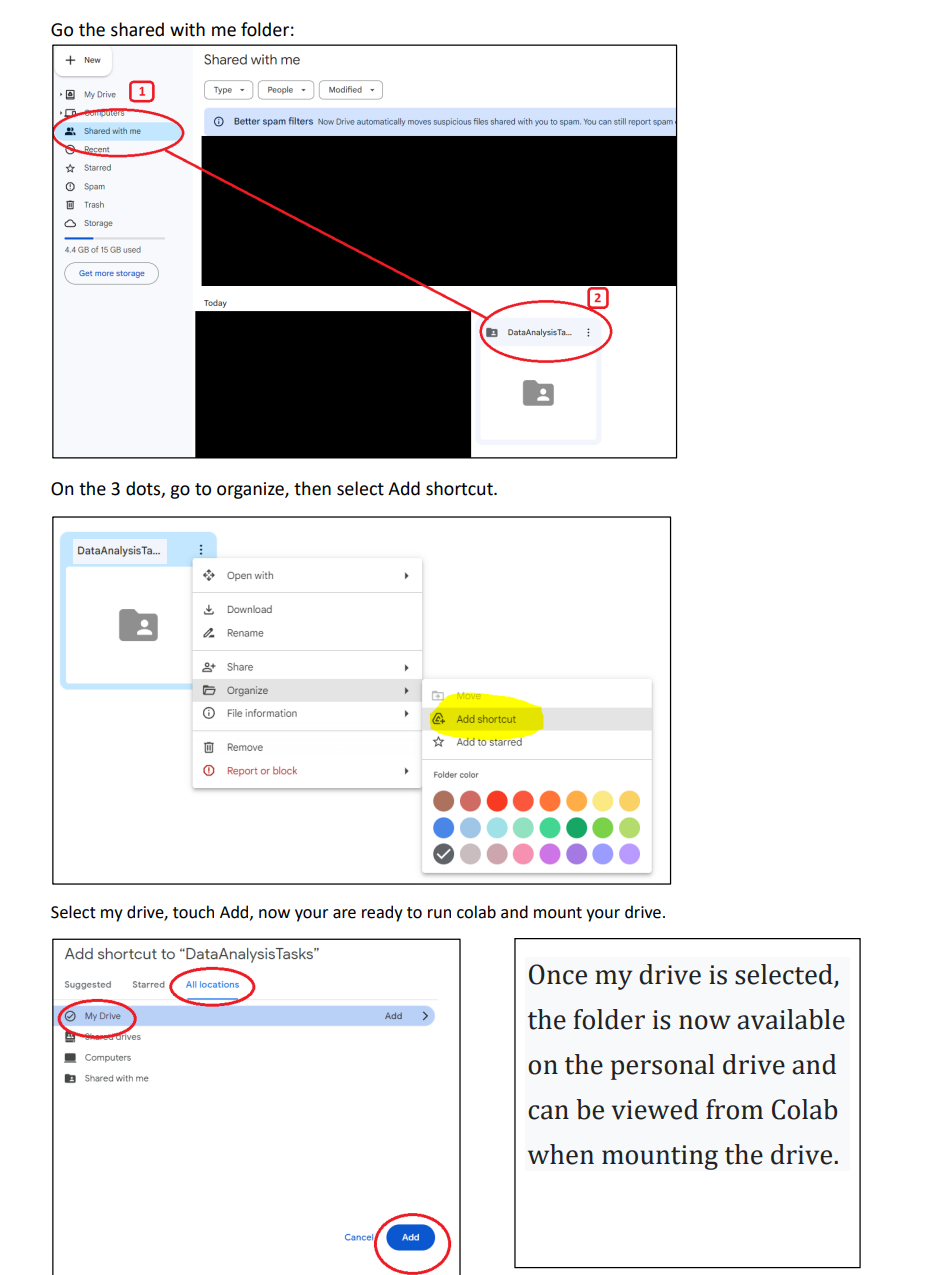

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


EXAMPLE FOR TEST THE CORRECT MOUNT OF GDRIVE

CSV file loaded successfully, you can start working right now


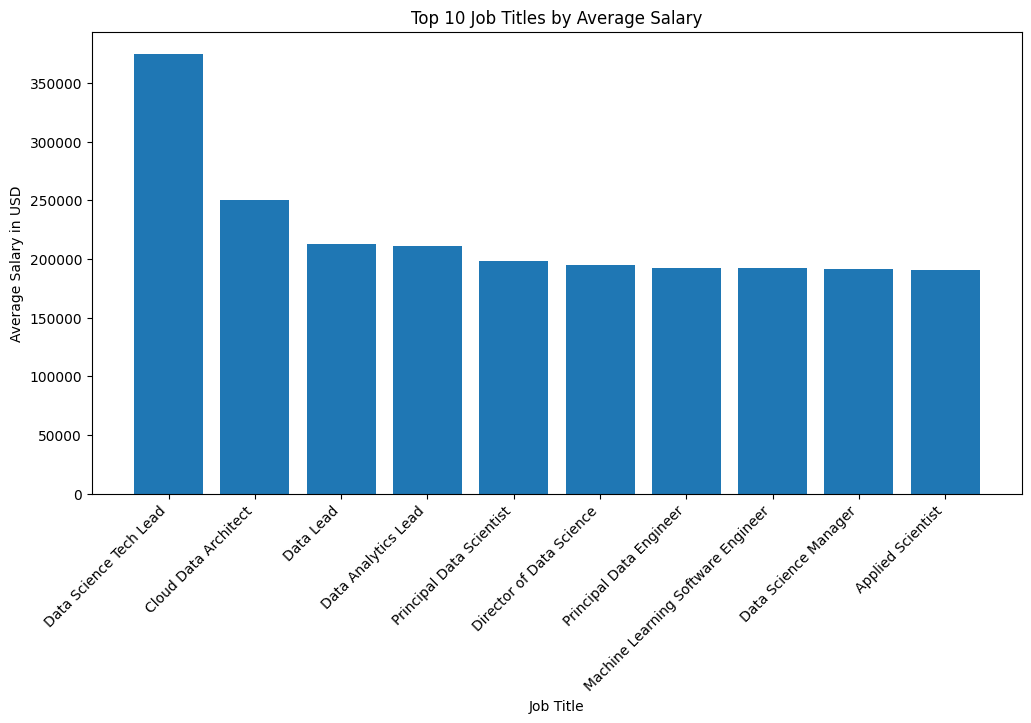

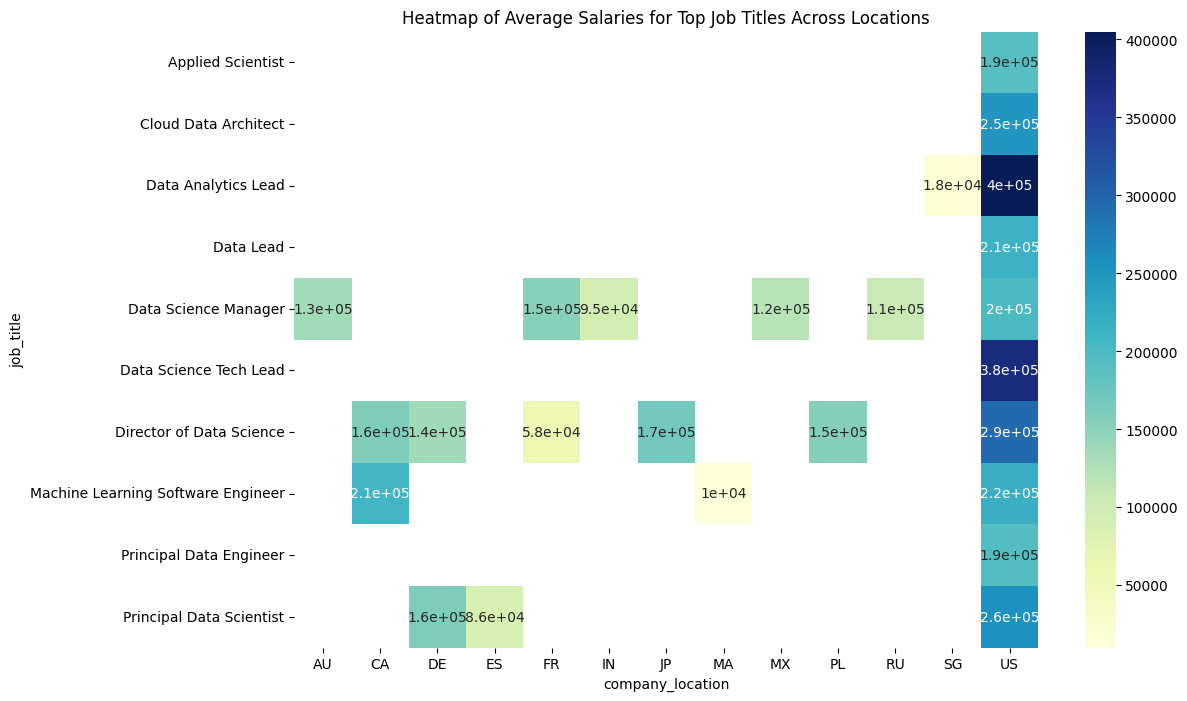

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    # Read the workout data from the CSV file
    data = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/data_science_salaries_2023.csv", encoding='ISO-8859-1')
    data.head()
    print("CSV file loaded successfully, you can start working right now")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}, please check the correct mount of the shared folder")

# Filtering the required columns
data_filtered = data[['job_title', 'salary_in_usd', 'company_location']]

# Calculating the average salary for each job title
avg_salaries = data_filtered.groupby('job_title')['salary_in_usd'].mean().reset_index()

# Finding the top 10 common job titles and their average salaries
top_job_titles = avg_salaries.nlargest(10, 'salary_in_usd')

# Plotting the top 10 common job titles
plt.figure(figsize=(12, 6))
plt.bar(top_job_titles['job_title'], top_job_titles['salary_in_usd'])
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.title('Top 10 Job Titles by Average Salary')
plt.xticks(rotation=45, ha='right')
plt.show()

# Exploring the trend between job titles and company locations
location_trends = data_filtered.groupby(['job_title', 'company_location'])['salary_in_usd'].mean().reset_index()

# Getting the job titles from the top_job_titles to filter
top_titles = top_job_titles['job_title']

# Filtering the location trends for top job titles
location_trends_filtered = location_trends[location_trends['job_title'].isin(top_titles)]

# Pivoting the DataFrame to create a heatmap
heatmap_data = location_trends_filtered.pivot_table(index='job_title', columns='company_location', values='salary_in_usd')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Average Salaries for Top Job Titles Across Locations')
plt.show()
